In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
X_train.shape
y_train.shape

(60000,)

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_test.shape
y_test.shape

(10000,)

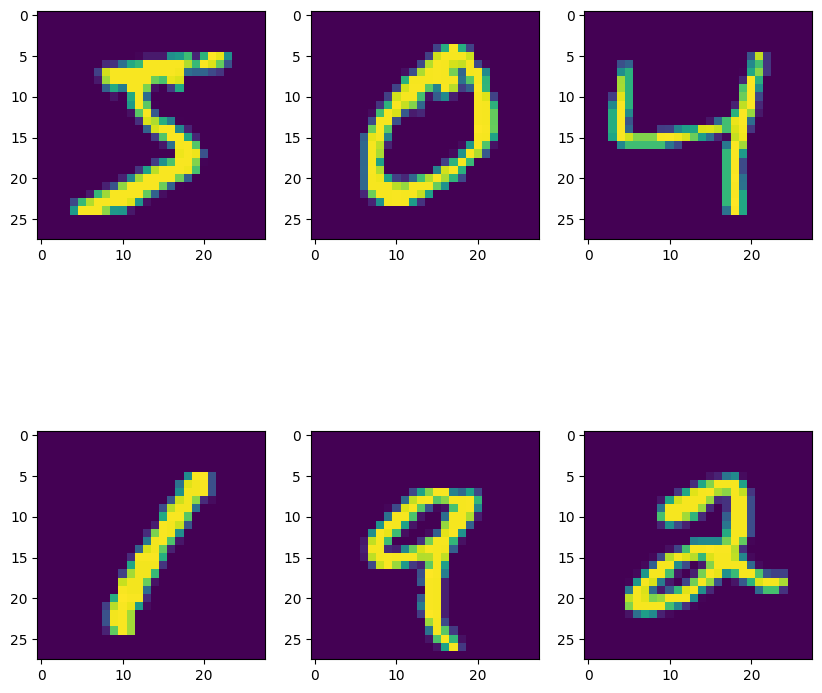

In [8]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i])
plt.show()

In [9]:
for i in range(6):
    print(y_train[i])

5
0
4
1
9
2


In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='linear'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [12]:
digit_recognition=model.fit(X_train,y_train,epochs=40)
loss,accuracy=model.evaluate(X_test,y_test)
print('Accuracy: %.2f'%(accuracy*100))

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2313 - accuracy: 0.9317
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0984 - accuracy: 0.9695
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0697 - accuracy: 0.9777
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0506 - accuracy: 0.9842
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0417 - accuracy: 0.9861
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9884
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0294 - accuracy: 0.9900
Epoch 8/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9927
Epoch 9/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 10/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.018

In [13]:
def prediction(mat):
    logits=model(mat)
    f_x=tf.nn.softmax(logits)
    print(np.argmax(f_x))

In [14]:
prediction(X_test[:1])

7


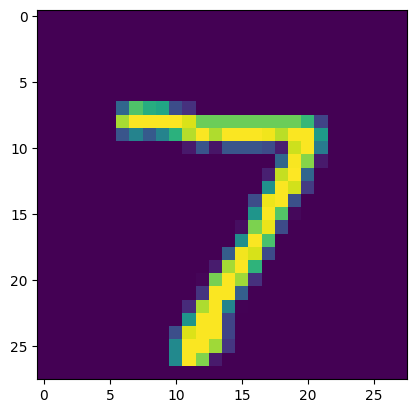

In [15]:
plt.imshow(X_test[0])

In [16]:
model.save("mnist_hand_Neural_model.h5")